#                                                   ENERGY CONSUMPTION PREDICTION

# Load Dataset

In [3]:
import pandas as pd

# Load the dataset
file_path = 'D:\ml project\energy consumption\Energy_consumption.csv'
energy_data = pd.read_csv(file_path)



In [8]:
# Display the first few rows of the dataset
display(energy_data.head())
# Display the shape of the dataset
print("shape", energy_data.shape)

Timestamp  Temperature   Humidity  SquareFootage  Occupancy  \
0  01-01-2022 00:00    25.139433  43.431581    1565.693999          5   
1  01-01-2022 01:00    27.731651  54.225919    1411.064918          1   
2  01-01-2022 02:00    28.704277  58.907658    1755.715009          2   
3  01-01-2022 03:00    20.080469  50.371637    1452.316318          1   
4  01-01-2022 04:00    23.097359  51.401421    1094.130359          9   

  HVACUsage LightingUsage  RenewableEnergy  DayOfWeek Holiday  \
0        On           Off         2.774699     Monday      No   
1        On            On        21.831384   Saturday      No   
2       Off           Off         6.764672     Sunday      No   
3       Off            On         8.623447  Wednesday      No   
4        On           Off         3.071969     Friday      No   

   EnergyConsumption  
0          75.364373  
1          83.401855  
2          78.270888  
3          56.519850  
4          70.811732

shape (1000, 11)


In [9]:
# Get basic information
print(energy_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB
None


In [10]:
# Get statistical summary
print(energy_data.describe())


       Temperature     Humidity  SquareFootage    Occupancy  RenewableEnergy  \
count  1000.000000  1000.000000    1000.000000  1000.000000      1000.000000   
mean     24.982026    45.395412    1500.052488     4.581000        15.132813   
std       2.836850     8.518905     288.418873     2.865598         8.745917   
min      20.007565    30.015974    1000.512661     0.000000         0.006642   
25%      22.645070    38.297722    1247.108548     2.000000         7.628385   
50%      24.751637    45.972116    1507.967426     5.000000        15.072296   
75%      27.418174    52.420066    1740.340165     7.000000        22.884064   
max      29.998671    59.969085    1999.982252     9.000000        29.965327   

       EnergyConsumption  
count        1000.000000  
mean           77.055873  
std             8.144112  
min            53.263278  
25%            71.544690  
50%            76.943696  
75%            82.921742  
max            99.201120  


In [11]:
# Check for missing values
print(energy_data.isnull().sum())

Timestamp            0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64


In [12]:
min_value=min(energy_data['Timestamp'])
max_value=max(energy_data['Timestamp'])
print(min_value ,'to', max_value)

01-01-2022 00:00 to 31-01-2022 23:00


# Encoding

In [14]:
# Safe datetime conversion
energy_data['Timestamp'] = pd.to_datetime(
    energy_data['Timestamp'],
    dayfirst=True,      # interprets '13-01-2022' as 13th Jan, not 1st of month 13
    errors='coerce',    # invalid dates become NaT instead of crashing
    format='mixed'      # allows Pandas to guess each row's format
)

# Optional: Check for rows where conversion failed
invalid_dates = energy_data[energy_data['Timestamp'].isna()]
if not invalid_dates.empty:
    print(f"⚠️ Found {len(invalid_dates)} invalid or missing timestamps.")

# Extract date features safely
energy_data['Hour'] = energy_data['Timestamp'].dt.hour
energy_data['Day'] = energy_data['Timestamp'].dt.day
energy_data['Month'] = energy_data['Timestamp'].dt.month
energy_data['Year'] = energy_data['Timestamp'].dt.year

# Drop the original 'Timestamp' column
energy_data = energy_data.drop(columns=['Timestamp'])

# One-hot encode categorical variables
energy_data = pd.get_dummies(energy_data, columns=['HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday'], drop_first=True)

# Display the first few rows of the updated dataset
print(energy_data.head())

# Get updated basic information
print(energy_data.info())

   Temperature   Humidity  SquareFootage  Occupancy  RenewableEnergy  \
0    25.139433  43.431581    1565.693999          5         2.774699   
1    27.731651  54.225919    1411.064918          1        21.831384   
2    28.704277  58.907658    1755.715009          2         6.764672   
3    20.080469  50.371637    1452.316318          1         8.623447   
4    23.097359  51.401421    1094.130359          9         3.071969   

   EnergyConsumption  Hour  Day  Month  Year  HVACUsage_On  LightingUsage_On  \
0          75.364373     0    1      1  2022          True             False   
1          83.401855     1    1      1  2022          True              True   
2          78.270888     2    1      1  2022         False             False   
3          56.519850     3    1      1  2022         False              True   
4          70.811732     4    1      1  2022          True             False   

   DayOfWeek_Monday  DayOfWeek_Saturday  DayOfWeek_Sunday  DayOfWeek_Thursday  \
0    

# Visualization

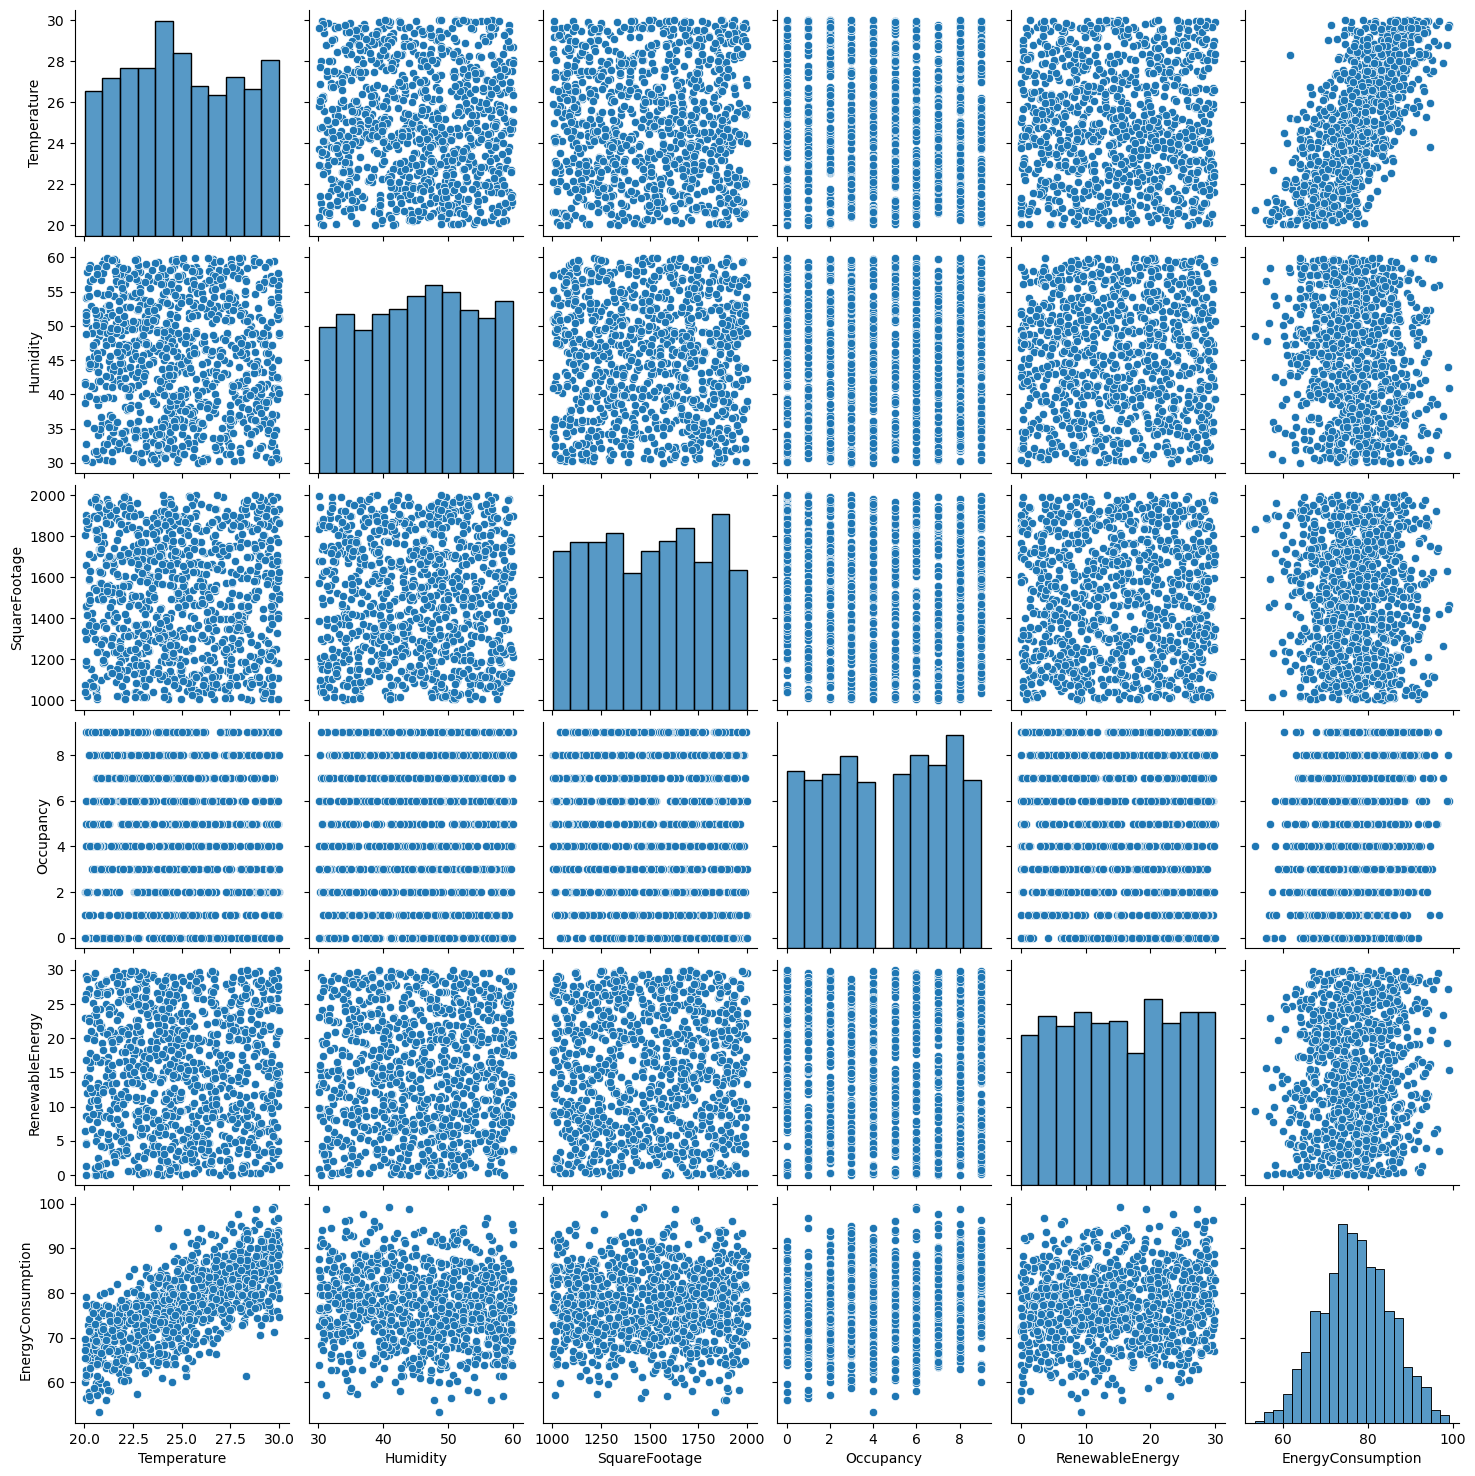

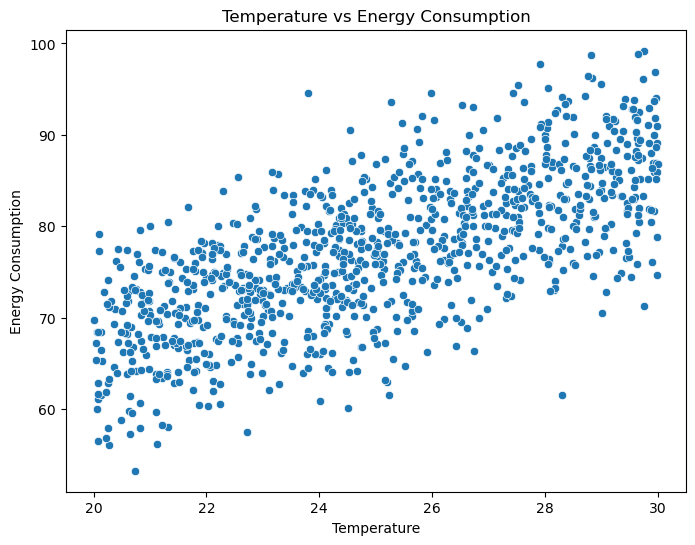

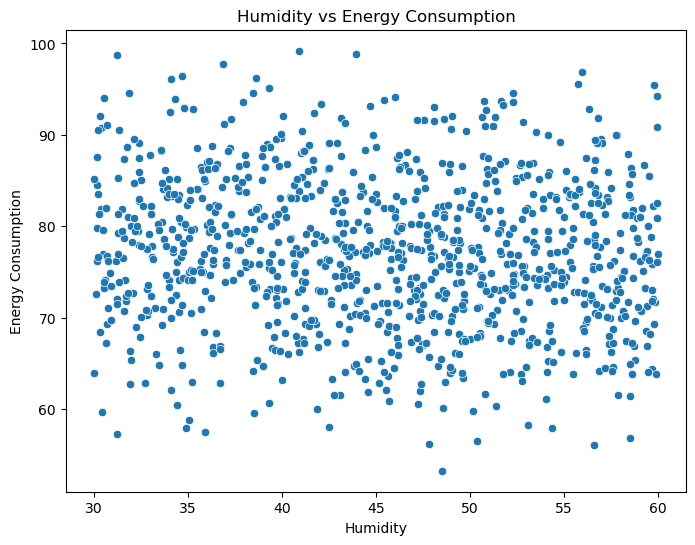

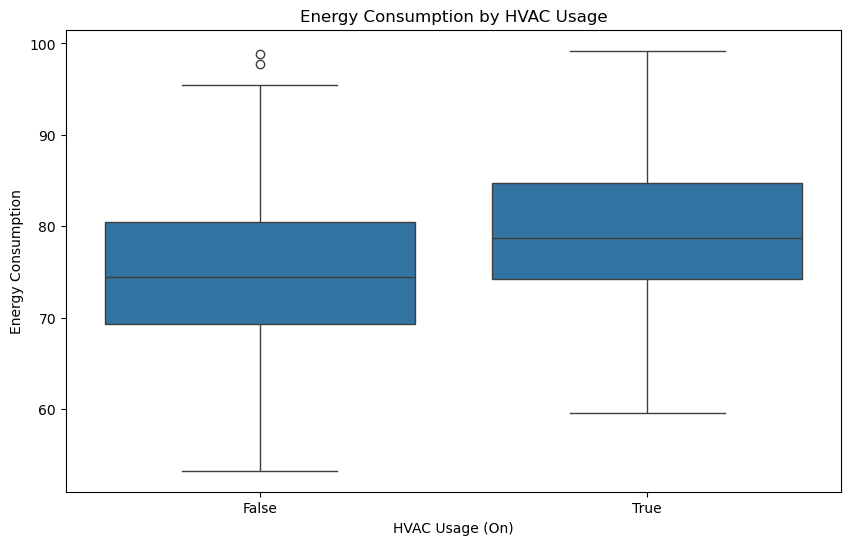

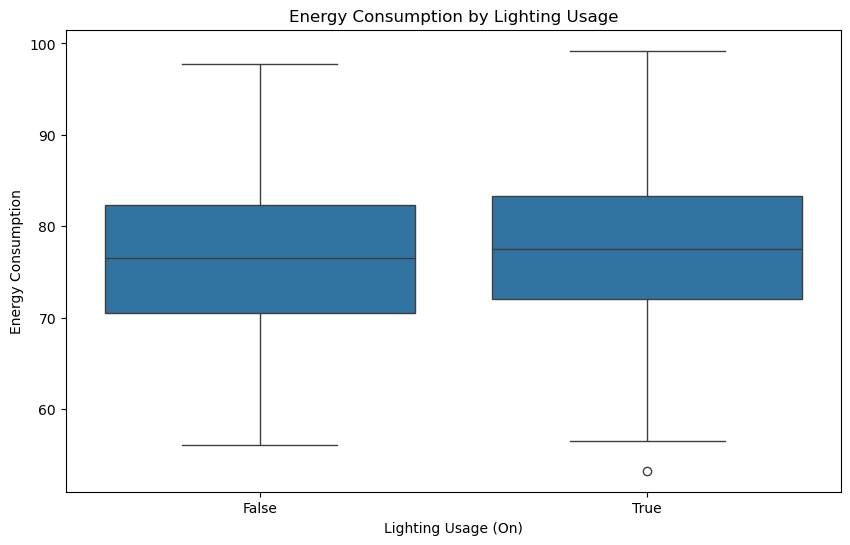

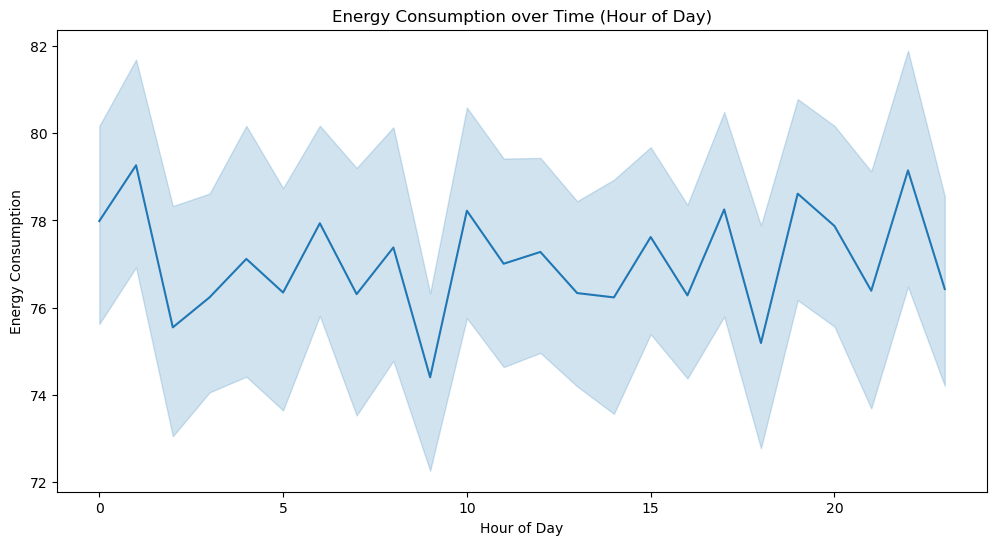

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot
sns.pairplot(energy_data[['Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'RenewableEnergy', 'EnergyConsumption']])
plt.show()

# Scatter Plots
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='EnergyConsumption', data=energy_data)
plt.title('Temperature vs Energy Consumption')
plt.xlabel('Temperature')
plt.ylabel('Energy Consumption')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Humidity', y='EnergyConsumption', data=energy_data)
plt.title('Humidity vs Energy Consumption')
plt.xlabel('Humidity')
plt.ylabel('Energy Consumption')
plt.show()

# Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='HVACUsage_On', y='EnergyConsumption', data=energy_data)
plt.title('Energy Consumption by HVAC Usage')
plt.xlabel('HVAC Usage (On)')
plt.ylabel('Energy Consumption')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='LightingUsage_On', y='EnergyConsumption', data=energy_data)
plt.title('Energy Consumption by Lighting Usage')
plt.xlabel('Lighting Usage (On)')
plt.ylabel('Energy Consumption')
plt.show()



# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='EnergyConsumption', data=energy_data)
plt.title('Energy Consumption over Time (Hour of Day)')
plt.xlabel('Hour of Day')
plt.ylabel('Energy Consumption')
plt.show()

# Outliers

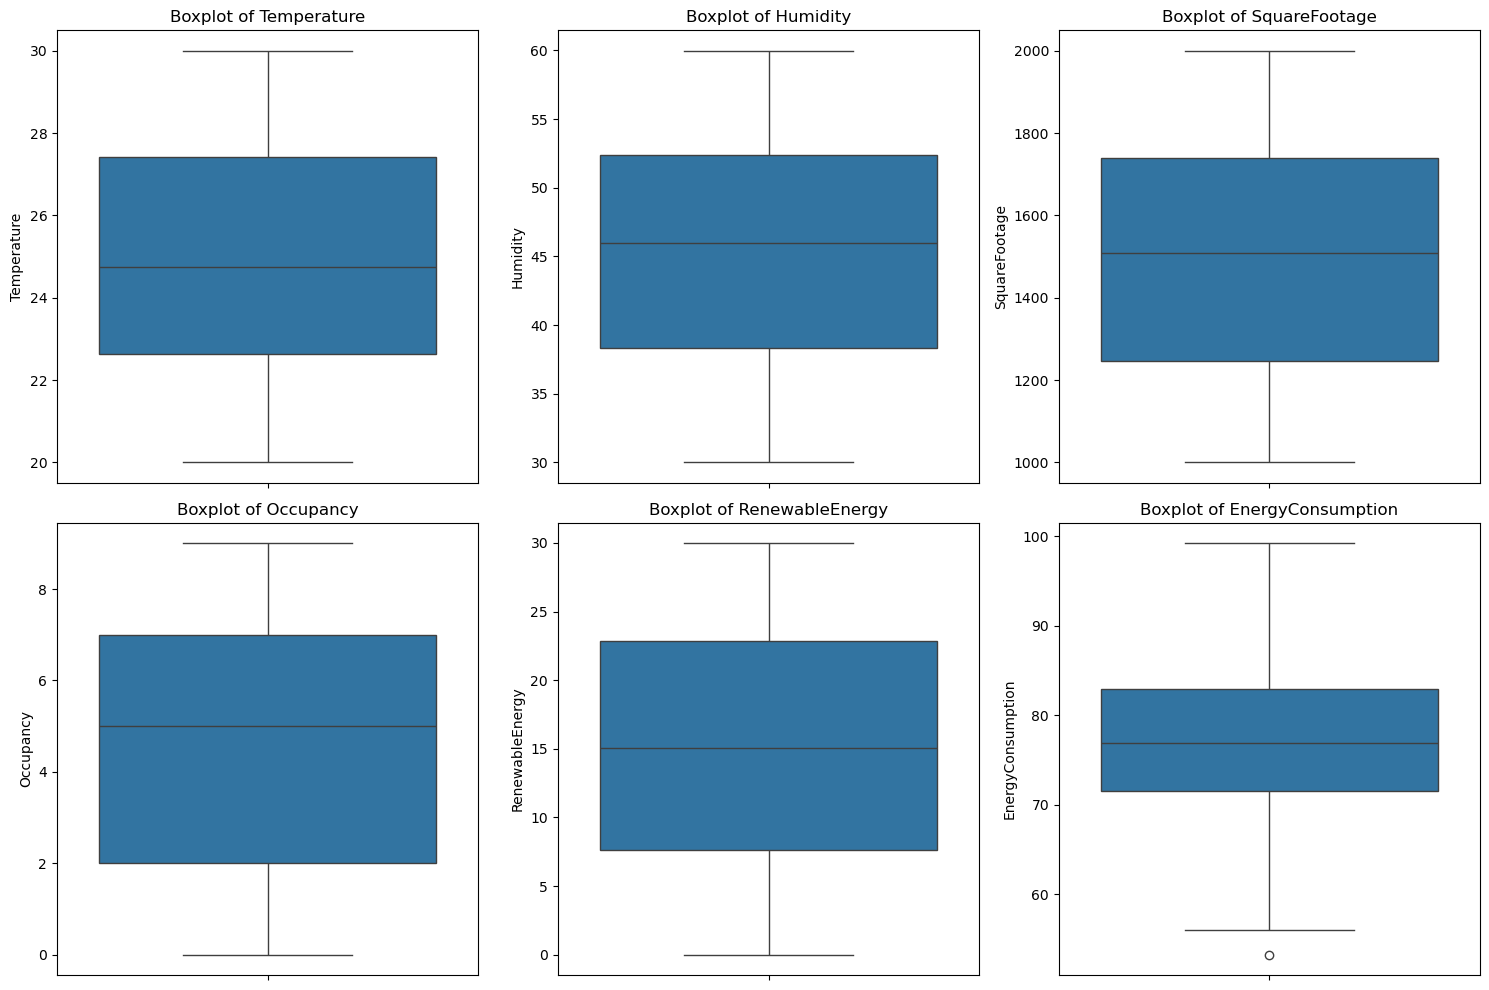

Number of outliers detected using Z-scores: 0
Empty DataFrame
Columns: [Temperature, Humidity, SquareFootage, Occupancy, RenewableEnergy, EnergyConsumption, Hour, Month, HVACUsage_On, LightingUsage_On, daysComb_True]
Index: []
Number of outliers detected using IQR: 1
    Temperature   Humidity  SquareFootage  Occupancy  RenewableEnergy  \
69    20.735716  48.506636    1836.542651          4         9.295439   

    EnergyConsumption  Hour  Month  HVACUsage_On  LightingUsage_On  \
69          53.263278    21      1             0                 1   

    daysComb_True  
69              1  


In [63]:

from scipy.stats import zscore

# List of numerical columns
numerical_columns = ['Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'RenewableEnergy', 'EnergyConsumption']

# Plot boxplots for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=energy_data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# Calculate Z-scores for numerical columns
z_scores = energy_data[numerical_columns].apply(zscore)

# Identify outliers (z-score > 3 or z-score < -3)
outliers = (z_scores.abs() > 3).any(axis=1)
print(f"Number of outliers detected using Z-scores: {outliers.sum()}")

# Display rows that are considered outliers
outliers_data = energy_data[outliers]
print(outliers_data)

# Calculate IQR for numerical columns
Q1 = energy_data[numerical_columns].quantile(0.25)
Q3 = energy_data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR
outliers = ((energy_data[numerical_columns] < (Q1 - 1.5 * IQR)) | (energy_data[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)
print(f"Number of outliers detected using IQR: {outliers.sum()}")

# Display rows that are considered outliers
outliers_data = energy_data[outliers]
print(outliers_data)

# Correlation matrix

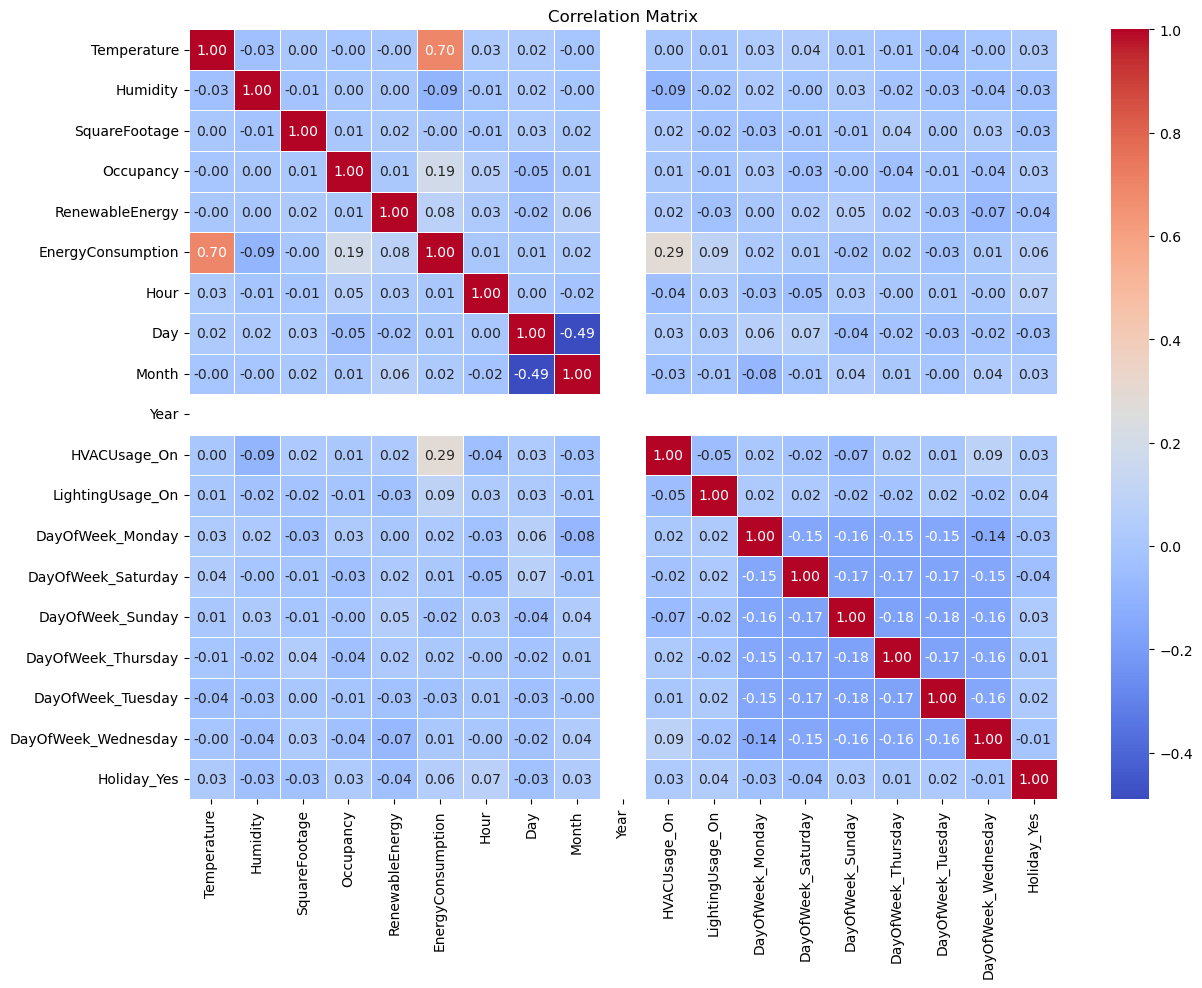

In [22]:
#Convert boolean columns to integers
boolean_columns = energy_data.select_dtypes(include='bool').columns
energy_data[boolean_columns] = energy_data[boolean_columns].astype(int)

# Calculate the correlation matrix
correlation_matrix = energy_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Visualize the mean energy consumption for weekdays vs weekends

In [28]:

# Load the dataset
file_path = 'D:\ml project\energy consumption\Energy_consumption.csv'
energy_data = pd.read_csv(file_path)

energy_data['Timestamp'] = pd.to_datetime(
    energy_data['Timestamp'],
    dayfirst=True,      # interprets '13-01-2022' as 13th Jan, not 1st of month 13
    errors='coerce',    # invalid dates become NaT instead of crashing
    format='mixed'      # allows Pandas to guess each row's format
)

# Optional: Check for rows where conversion failed
invalid_dates = energy_data[energy_data['Timestamp'].isna()]
if not invalid_dates.empty:
    print(f"⚠️ Found {len(invalid_dates)} invalid or missing timestamps.")
energy_data['DayOfWeek'] = energy_data['Timestamp'].dt.dayofweek



   Weekend       mean     median       std        min        max
0  Weekday  76.724366  76.700264  8.202484  53.263278  99.201120
1  Weekend  77.875431  77.664911  7.952806  56.519850  98.843756


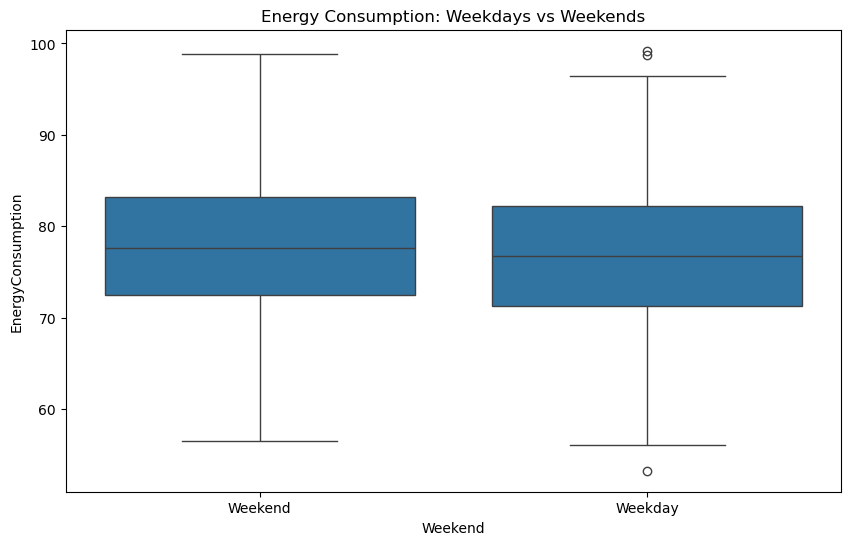

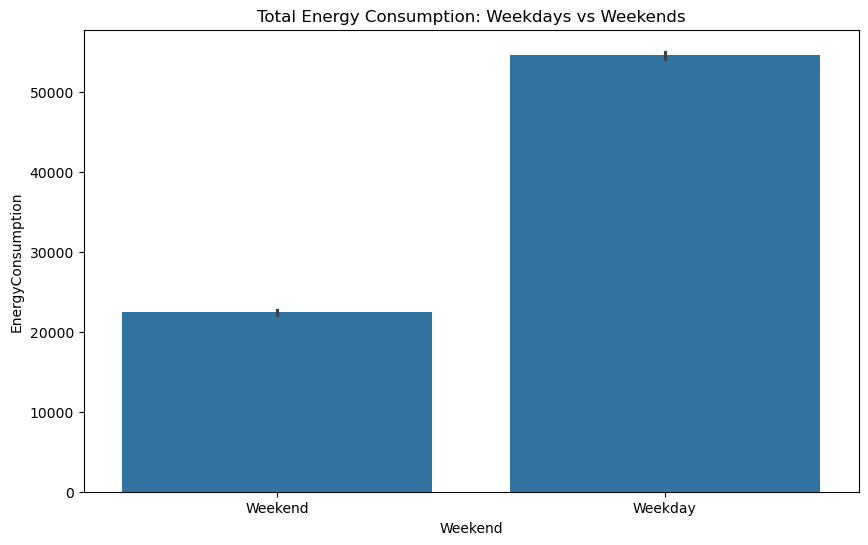

In [29]:
# Create a new column for Weekday/Weekend
energy_data['Weekend'] = energy_data['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

energy_data['DayOfWeek'] = energy_data['Timestamp'].dt.dayofweek

# One-hot encode categorical variables
#energy_data = pd.get_dummies(energy_data, columns=['HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday'], drop_first=True)

# Convert boolean columns to integers
boolean_columns = energy_data.select_dtypes(include='bool').columns
energy_data[boolean_columns] = energy_data[boolean_columns].astype(int)

# Calculate descriptive statistics for energy consumption
weekend_stats = energy_data.groupby('Weekend')['EnergyConsumption'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()
print(weekend_stats)

# Visualize the energy consumption for weekdays vs weekends
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weekend', y='EnergyConsumption', data=energy_data)
plt.title('Energy Consumption: Weekdays vs Weekends')
plt.show()

# Visualize the mean energy consumption for weekdays vs weekends
plt.figure(figsize=(10, 6))
sns.barplot(x='Weekend', y='EnergyConsumption', data=energy_data, estimator=sum)
plt.title('Total Energy Consumption: Weekdays vs Weekends')
plt.show()

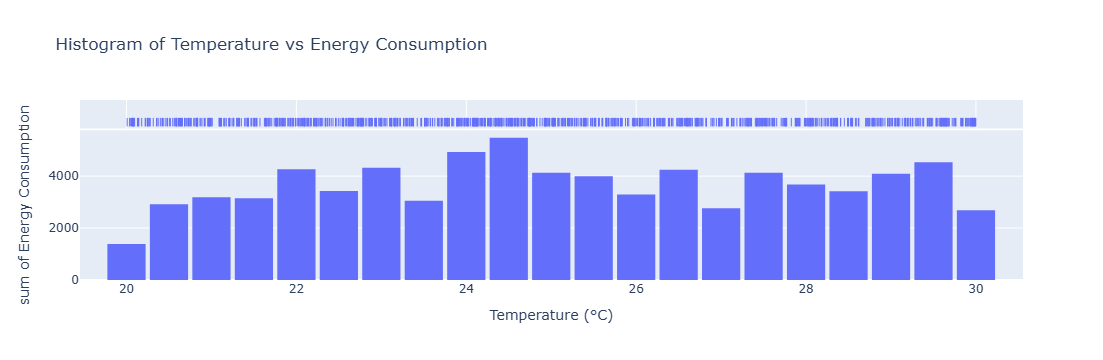

In [32]:
import plotly.express as px
# Plotly histogram
fig = px.histogram(energy_data, x="Temperature", y="EnergyConsumption", marginal="rug",
                   hover_data=energy_data.columns,
                   title='Histogram of Temperature vs Energy Consumption',
                   labels={'Temperature': 'Temperature (°C)', 'EnergyConsumption': 'Energy Consumption'})
fig.update_layout(bargap=0.1)  # Gap between bars

# Show plot
fig.show()

# RandomForestRegressor feature importances

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Load the dataset
file_path = 'D:\ml project\energy consumption\Energy_consumption.csv'
energy_data = pd.read_csv(file_path)



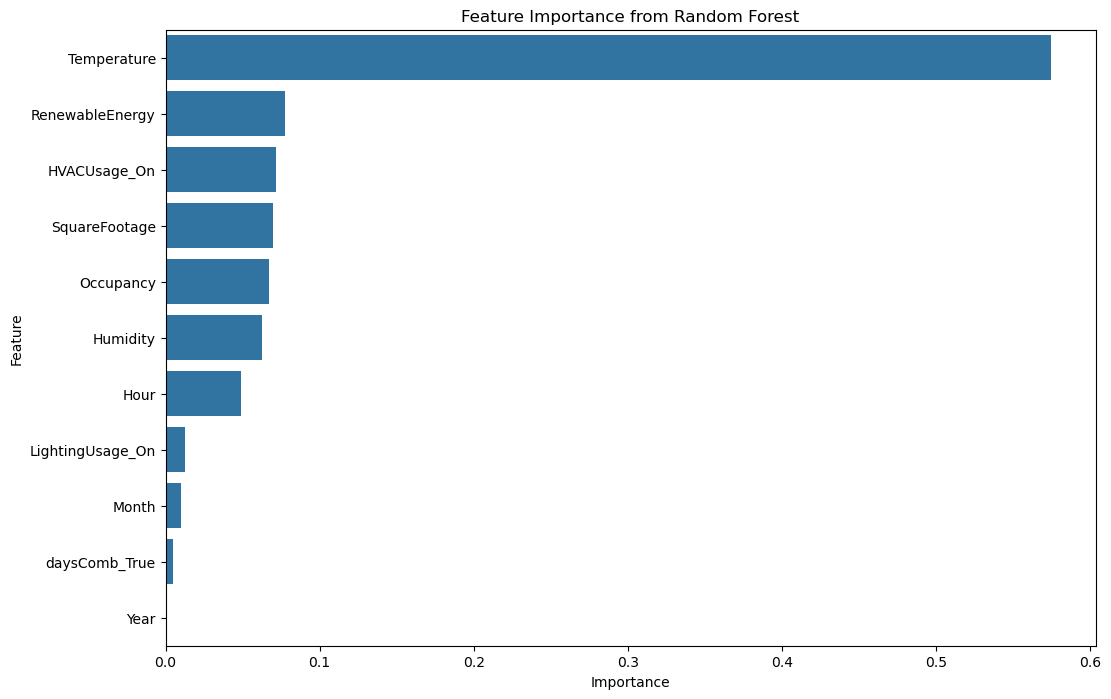

In [47]:
# Step 1: Convert Timestamp safely
energy_data['Timestamp'] = pd.to_datetime(
    energy_data['Timestamp'],
    dayfirst=True,
    errors='coerce',
    format='mixed'
)

# Step 2: Extract new features
energy_data['Hour'] = energy_data['Timestamp'].dt.hour
energy_data['Day'] = energy_data['Timestamp'].dt.day
energy_data['Month'] = energy_data['Timestamp'].dt.month
energy_data['Year'] = energy_data['Timestamp'].dt.year
energy_data['DayOfWeek'] = energy_data['Timestamp'].dt.dayofweek  # 0=Mon, 6=Sun

# Step 3: If you really don’t need Timestamp anymore
# (do this last, after extraction)
energy_data = energy_data.drop(columns=['Timestamp'])


# Create a new column 'CombinedCategory' for specified features
# Ensure to use the correct column names based on your current DataFrame
energy_data['daysComb'] = (energy_data['DayOfWeek'] == 5) | \
                                  (energy_data['DayOfWeek'] == 4) | \
                                  (energy_data['DayOfWeek'] == 6) | \
                                  (energy_data['DayOfWeek'] == 3) | \
                                  (energy_data['Day'] >= 20) | \
                                  (energy_data['Day'] <= 10) | \
                                  (energy_data['Holiday'] == 'Yes')

# Drop the original columns that were combined into 'CombinedCategory'
columns_to_drop = ['DayOfWeek', 'Day', 'Holiday']  # Adjust column names based on your specific scenario
energy_data = energy_data.drop(columns=columns_to_drop)

energy_data = pd.get_dummies(energy_data, columns=['HVACUsage', 'LightingUsage', 'daysComb'], drop_first=True)


# Convert boolean columns to integers
boolean_columns = energy_data.select_dtypes(include='bool').columns
energy_data[boolean_columns] = energy_data[boolean_columns].astype(int)

# Prepare the feature matrix and target vector
X = energy_data.drop(columns=['EnergyConsumption'])
y = energy_data['EnergyConsumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

# Feature contact

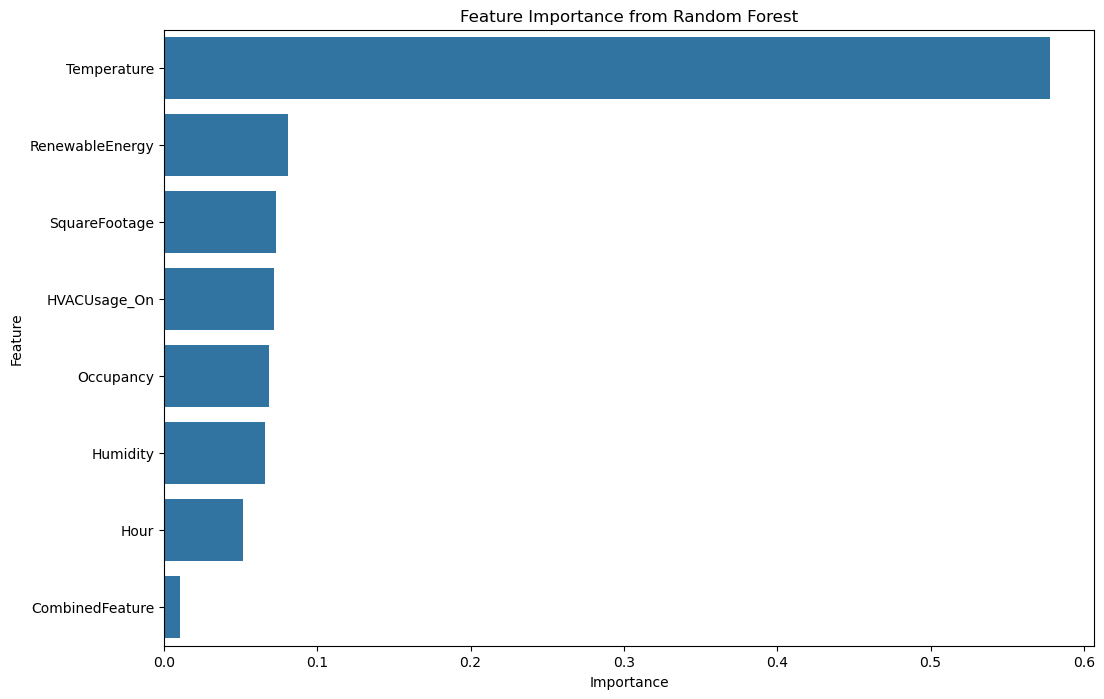

Mean Squared Error: 30.24949269257202
R-squared: 0.5381748065049634


In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'D:\ml project\energy consumption\Energy_consumption.csv'
energy_data = pd.read_csv(file_path)


# Step 1: Convert Timestamp safely
energy_data['Timestamp'] = pd.to_datetime(
    energy_data['Timestamp'],
    dayfirst=True,
    errors='coerce',
    format='mixed'
)

# Step 2: Extract new features
energy_data['Hour'] = energy_data['Timestamp'].dt.hour
energy_data['Day'] = energy_data['Timestamp'].dt.day
energy_data['Month'] = energy_data['Timestamp'].dt.month
energy_data['Year'] = energy_data['Timestamp'].dt.year
energy_data['DayOfWeek'] = energy_data['Timestamp'].dt.dayofweek  # 0=Mon, 6=Sun

# Drop the original 'Timestamp' and 'Year' columns
energy_data = energy_data.drop(columns=['Timestamp', 'Year'])

# Create a new column 'CombinedCategory' for specified features
energy_data['daysComb_True'] = (energy_data['DayOfWeek'] == 5) | \
                               (energy_data['DayOfWeek'] == 4) | \
                               (energy_data['DayOfWeek'] == 6) | \
                               (energy_data['DayOfWeek'] == 3) | \
                               (energy_data['Day'] >= 20) | \
                               (energy_data['Day'] <= 10) | \
                               (energy_data['Holiday'] == 'Yes')

# Drop the original columns that were combined into 'daysComb_True'
columns_to_drop = ['DayOfWeek', 'Day', 'Holiday']  # Adjust column names based on your specific scenario
energy_data = energy_data.drop(columns=columns_to_drop)

# One-hot encode remaining categorical variables
energy_data = pd.get_dummies(energy_data, columns=['HVACUsage', 'LightingUsage'], drop_first=True)

# Convert boolean columns to integers
boolean_columns = energy_data.select_dtypes(include='bool').columns
energy_data[boolean_columns] = energy_data[boolean_columns].astype(int)

# Binning the features into a single category
energy_data['CombinedFeature'] = energy_data['daysComb_True'] | energy_data['Month'] | energy_data['LightingUsage_On']

# Drop the original columns that were binned
energy_data = energy_data.drop(columns=['daysComb_True', 'Month', 'LightingUsage_On'])

# Prepare the feature matrix and target vector
X = energy_data.drop(columns=['EnergyConsumption'])
y = energy_data['EnergyConsumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Optionally, you can also evaluate other metrics like R-squared
r2 = rf.score(X_test, y_test)
print(f"R-squared: {r2}")

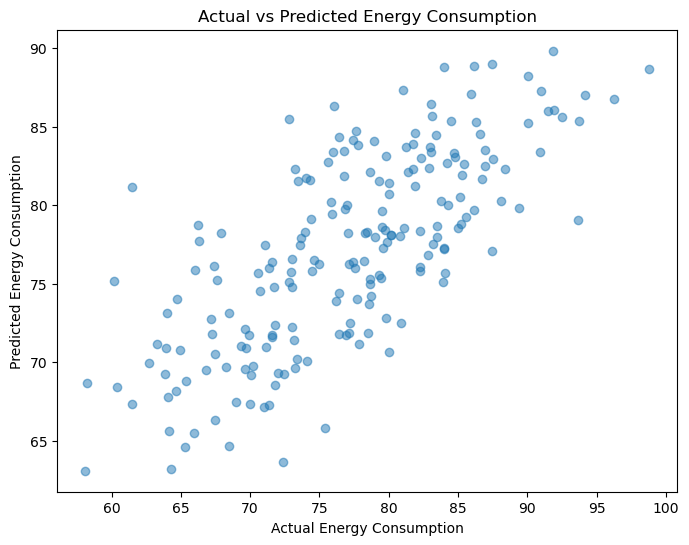

In [50]:
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Plotting actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Actual vs Predicted Energy Consumption')
plt.show()

Mean Absolute Error (MAE): 4.32
Mean Squared Error (MSE): 28.89
R-squared (R2) Score: 0.5590


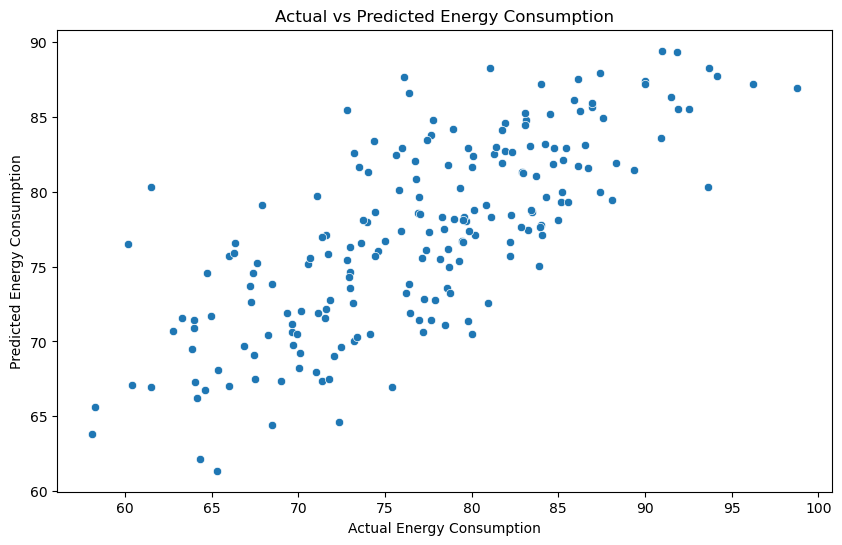

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'D:\ml project\energy consumption\Energy_consumption.csv'
energy_data = pd.read_csv(file_path)

# Select features and target
numeric_features = ['Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'RenewableEnergy']
categorical_features = ['HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday']
target = 'EnergyConsumption'

# Prepare X (features) and y (target)
X = energy_data[numeric_features + categorical_features]
y = energy_data[target]

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.4f}")

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Actual vs Predicted Energy Consumption')
plt.show()

# GridSearchCV and hyperparameters for RandomForestRegressor

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Tuned Mean Squared Error: 29.97375910523064
Tuned R-squared: 0.542384487593542


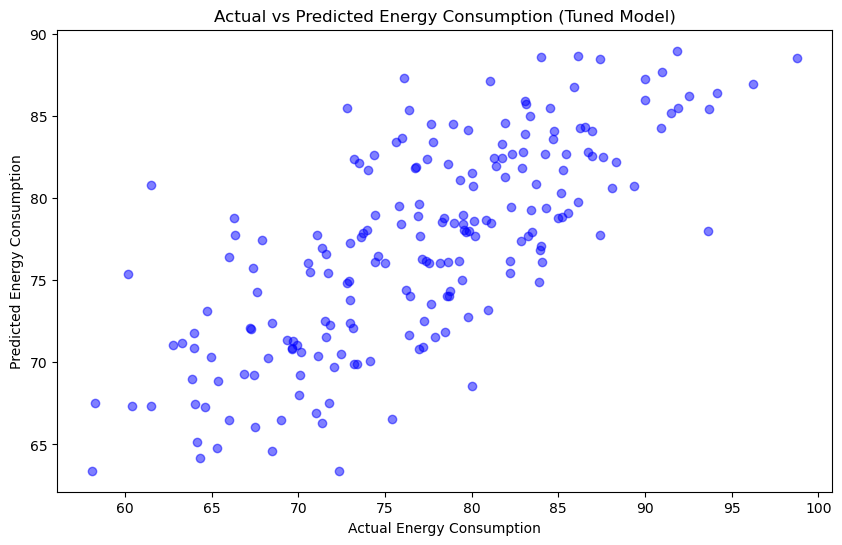

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'D:\ml project\energy consumption\Energy_consumption.csv'
energy_data = pd.read_csv(file_path)

# Step 1: Convert Timestamp safely
energy_data['Timestamp'] = pd.to_datetime(
    energy_data['Timestamp'],
    dayfirst=True,
    errors='coerce',
    format='mixed'
)

# Step 2: Extract new features
energy_data['Hour'] = energy_data['Timestamp'].dt.hour
energy_data['Day'] = energy_data['Timestamp'].dt.day
energy_data['Month'] = energy_data['Timestamp'].dt.month
energy_data['Year'] = energy_data['Timestamp'].dt.year
energy_data['DayOfWeek'] = energy_data['Timestamp'].dt.dayofweek  # 0=Mon, 6=Sun

# Drop the original 'Timestamp' and 'Year' columns
energy_data = energy_data.drop(columns=['Timestamp', 'Year'])

# Create a new column 'CombinedCategory' for specified features
energy_data['daysComb'] = (energy_data['DayOfWeek'] == 5) | \
                                  (energy_data['DayOfWeek'] == 4) | \
                                  (energy_data['DayOfWeek'] == 6) | \
                                  (energy_data['DayOfWeek'] == 3) | \
                                  (energy_data['Day'] >= 20) | \
                                  (energy_data['Day'] <= 10) | \
                                  (energy_data['Holiday'] == 'Yes')

# Drop the original columns that were combined into 'CombinedCategory'
columns_to_drop = ['DayOfWeek', 'Day', 'Holiday']  # Adjust column names based on your specific scenario
energy_data = energy_data.drop(columns=columns_to_drop)

# One-hot encode remaining categorical variables
energy_data = pd.get_dummies(energy_data, columns=['HVACUsage', 'LightingUsage', 'daysComb'], drop_first=True)

# Convert boolean columns to integers
boolean_columns = energy_data.select_dtypes(include='bool').columns
energy_data[boolean_columns] = energy_data[boolean_columns].astype(int)

# Prepare the feature matrix and target vector
X = energy_data.drop(columns=['EnergyConsumption'])
y = energy_data['EnergyConsumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    # Add more hyperparameters to tune if needed
}

# Initialize GridSearchCV hyperparameters
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,  # Number of cross-validation folds
                           verbose=1,
                           n_jobs=-1  # Use all processors
                          )

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_tuned = best_model.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print("Best Hyperparameters:", best_params)
print("Tuned Mean Squared Error:", mse_tuned)
print("Tuned R-squared:", r2_tuned)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tuned, color='blue', alpha=0.5)
plt.title('Actual vs Predicted Energy Consumption (Tuned Model)')
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.show()

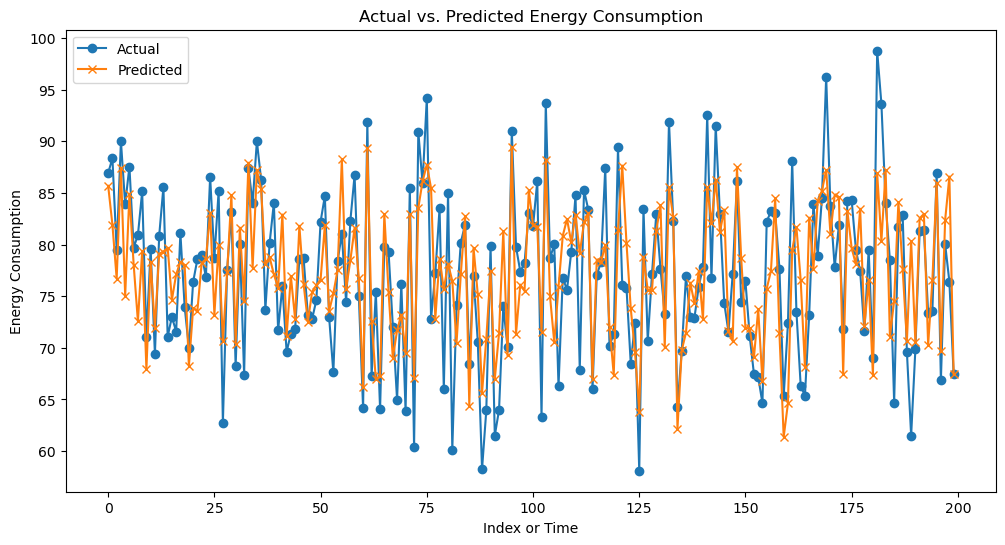

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.xlabel('Index or Time')
plt.ylabel('Energy Consumption')
plt.title('Actual vs. Predicted Energy Consumption')
plt.legend()
plt.show()

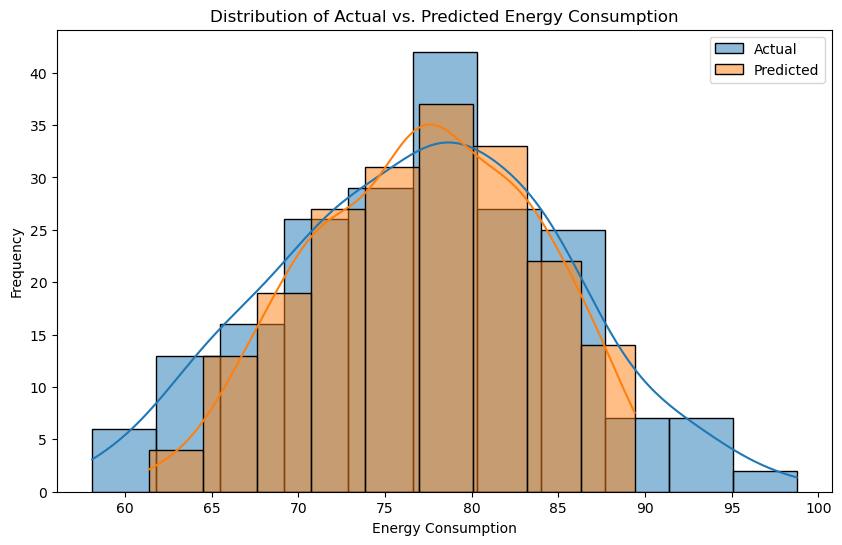

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, label='Actual', kde=True)
sns.histplot(y_pred, label='Predicted', kde=True)
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs. Predicted Energy Consumption')
plt.legend()
plt.show()

# Support vector regressor

In [56]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Scale the data for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model
svr = SVR(kernel='rbf')

# Fit the model on scaled training data
svr.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svr = svr.predict(X_test_scaled)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regressor:")
print(f"Mean Squared Error: {mse_svr}")
print(f"R-squared: {r2_svr}")

Support Vector Regressor:
Mean Squared Error: 28.827989222054434
R-squared: 0.5598771908060018


Linear regression

In [57]:
from sklearn.linear_model import LinearRegression

# Initialize the model
lr = LinearRegression()

# Fit the model on training data
lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print(f"Mean Squared Error: {mse_lr}")
print(f"R-squared: {r2_lr}")

Linear Regression:
Mean Squared Error: 26.408275673885047
R-squared: 0.5968194525802066


# Gradient Boosting Regressor

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)

# Fit the model on training data
gbr.fit(X_train, y_train)

# Make predictions
y_pred_gbr = gbr.predict(X_test)

# Evaluate the model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting Regressor:")
print(f"Mean Squared Error: {mse_gbr}")
print(f"R-squared: {r2_gbr}")

Gradient Boosting Regressor:
Mean Squared Error: 32.47313943218634
R-squared: 0.5042259368090707


Linear Regression GridSearchCV for hyperparameter tuning

In [59]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Example pipeline with polynomial features and Ridge regression
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),  # Adjust degree as needed
    ('scaler', StandardScaler()),  # Scale features if necessary
    ('ridge', Ridge())  # Ridge regression with default alpha=1.0
])

# Parameters for GridSearchCV
param_grid = {
    'ridge__alpha': [0.1, 1.0, 10.0]  # Example values for regularization strength
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Mean Squared Error:", -grid_search.best_score_)

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Tuned Mean Squared Error:", mse)
print("Tuned R-squared:", r2)

Best Parameters: {'ridge__alpha': 10.0}
Best Mean Squared Error: 26.323431986737027
Tuned Mean Squared Error: 27.322881869476138
Tuned R-squared: 0.5828559726784648


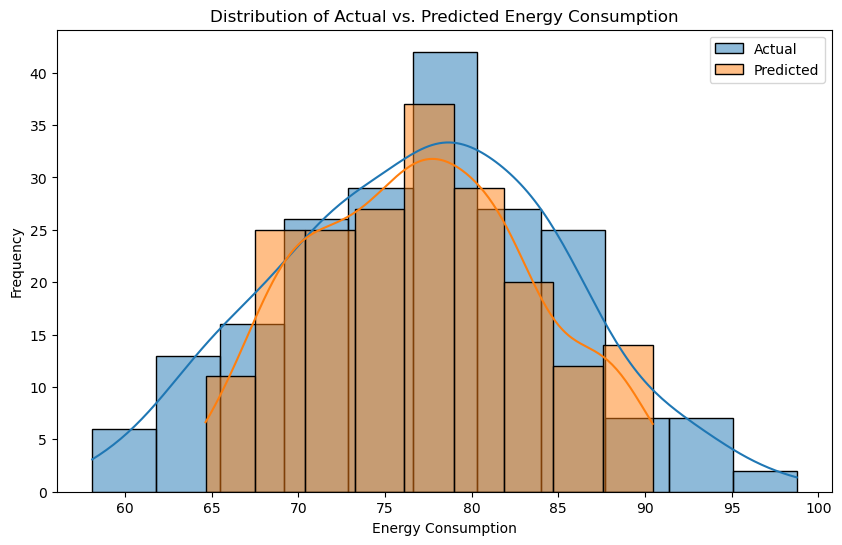

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, label='Actual', kde=True)
sns.histplot(y_pred, label='Predicted', kde=True)
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs. Predicted Energy Consumption')
plt.legend()
plt.show()

# Random oversampling for regression

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Example: Define thresholds based on quantiles or specific values
# Adjust these thresholds based on your data distribution
threshold_low = np.percentile(y_train, 60)  # Example: 10th percentile
threshold_high = np.percentile(y_train, 90)  # Example: 90th percentile

# Generate synthetic samples for low and high ranges
np.random.seed(42)

# Select indices for low and high ranges
low_indices = np.where(y_train < threshold_low)[0]
high_indices = np.where(y_train > threshold_high)[0]

# Oversample from the low and high ranges
num_samples = len(y_train) // 4  # Adjust as needed based on your data size
low_samples = np.random.choice(low_indices, size=num_samples, replace=True)
high_samples = np.random.choice(high_indices, size=num_samples, replace=True)

# Combine indices
indices_to_resample = np.concatenate([low_samples, high_samples])

# Create synthetic data by duplicating selected samples
X_resampled = X_train.iloc[indices_to_resample]
y_resampled = y_train.iloc[indices_to_resample]

# Concatenate original and resampled data
X_train_resampled = pd.concat([X_train, X_resampled])
y_train_resampled = pd.concat([y_train, y_resampled])

# Example pipeline with polynomial features and Ridge regression
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),  # Adjust degree as needed
    ('scaler', StandardScaler()),  # Scale features if necessary
    ('ridge', Ridge())  # Ridge regression with default alpha=1.0
])

# Parameters for GridSearchCV
param_grid = {
    'ridge__alpha': [0.1, 1.0, 10.0]  # Example values for regularization strength
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Mean Squared Error:", -grid_search.best_score_)

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Tuned Mean Squared Error:", mse)
print("Tuned R-squared:", r2)

Best Parameters: {'ridge__alpha': 10.0}
Best Mean Squared Error: 29.516735835121658
Tuned Mean Squared Error: 29.97387287053082
Tuned R-squared: 0.5423827507154296


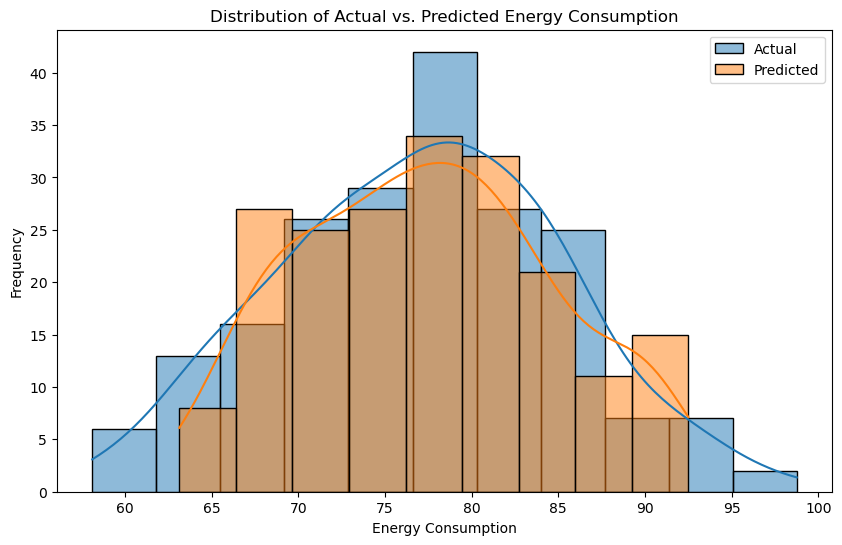

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, label='Actual', kde=True)
sns.histplot(y_pred, label='Predicted', kde=True)
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs. Predicted Energy Consumption')
plt.legend()
plt.show()